In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
# смотрим первый файл
df_2015 = pd.read_csv('2015.csv')
df_2015['year'] = 2015
df_2015


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


Не вооруженным глазом видно, что лучше всего в Западной Европе с тяготением к Скандинавии, а хуже в Африке :-)
На самом деле существует несколько оценок счастья (уровни и индексы, всемирные и международные и т.п.), которые делаются различными исследовательскими центрами. То, что скачено с kaggle.com, похоже на данные ООН.

Text(0, 0.5, 'Стандартная ошибка')

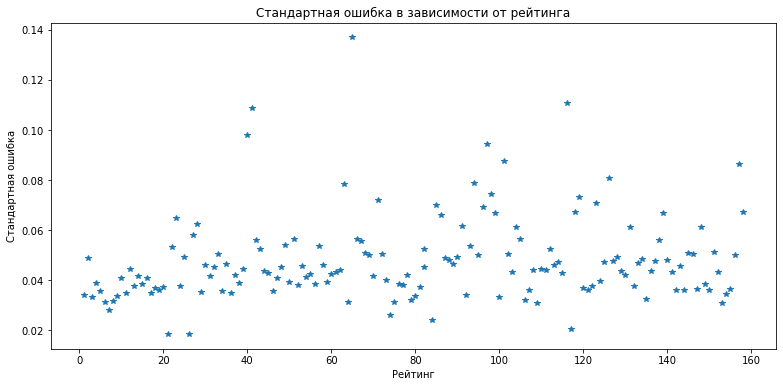

In [4]:
# Поанализируем ошибку

plt.plot(df_2015['Happiness Rank'],df_2015['Standard Error'], '*')
plt.title('Стандартная ошибка в зависимости от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Стандартная ошибка')

#plt.plot(df_2015['Dystopia Residual'],df_2015['Standard Error'], '*')
#plt.plot(df_2015['Happiness Score'],df_2015['Standard Error'], '*')

<AxesSubplot:title={'center':'Стандартная ошибка'}>

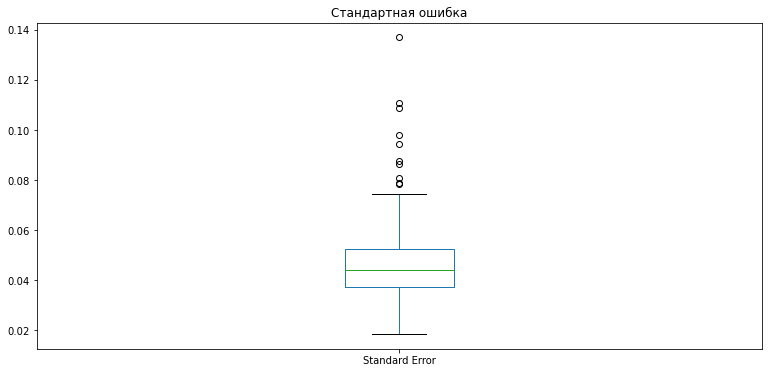

In [5]:
df_2015['Standard Error'].plot(kind='box', title='Стандартная ошибка')

на первый взгляд нет зависимости между ошибкой и местом страны в рейтинге (или абсолютной оценкой счастья), в принципе, можно принять, что ошибка постоянна и равна 0.048; отдельные выбросы могут быть объяснены единичными ответами отдельных респондентов, жизнь которых (или восприятие ее) отличается от среднестатистического по стране :-)

Text(0, 0.5, 'Частота')

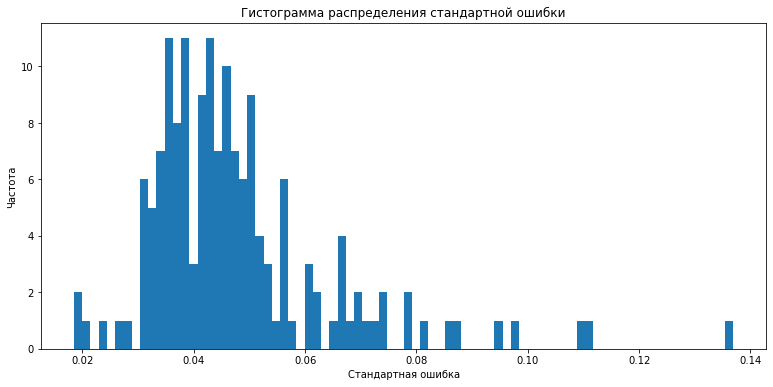

In [6]:
# строим гистограмму
plt.hist(df_2015['Standard Error'], bins = 80 )
plt.title('Гистограмма распределения стандартной ошибки')
plt.xlabel('Стандартная ошибка')
plt.ylabel('Частота')

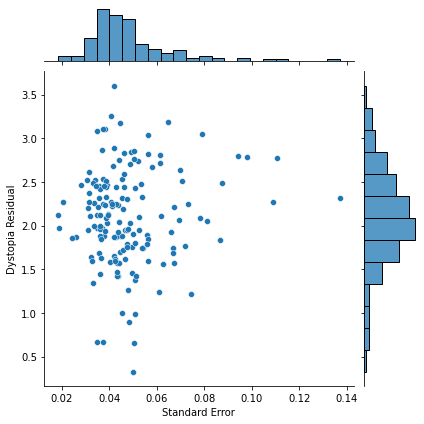

In [7]:
import seaborn as sns
sns.jointplot(x='Standard Error', y='Dystopia Residual', data=df_2015, kind='scatter')
#sns.jointplot(x='Happiness Rank', y='Trust (Government Corruption)', data=df_2015, kind='scatter')

напрямую на нормальный закон распределения не похоже, но если поиграть шириной диапазонов, то, наверняка, можно достичь чего-то похожего на нормальный закон (joinplot сделал что-то в этом направлении)

Таким образом, на основании вышенарисованного, можно считать полученные оценки объективными.

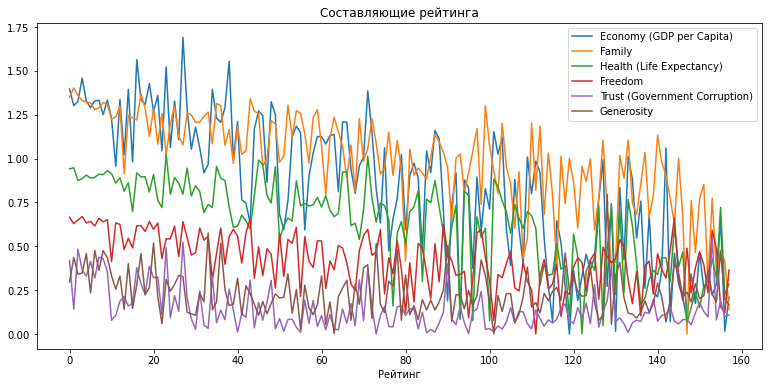

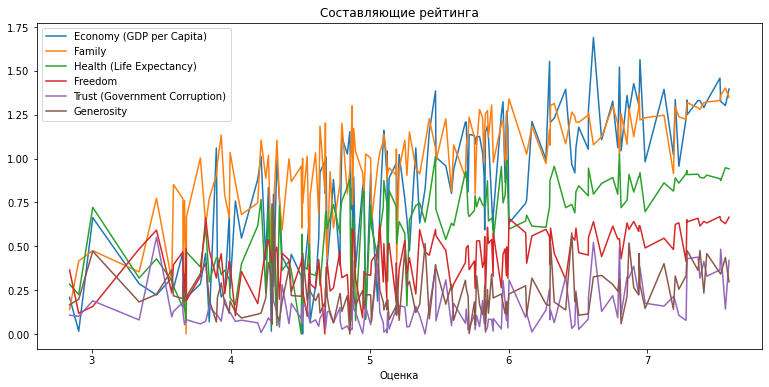

In [8]:
# нарисуем составляющие рейтинга
xCol = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
for y in xCol:
    plt.plot(df_2015[y])
plt.title('Составляющие рейтинга')    
plt.xlabel('Рейтинг')
plt.legend(xCol)
plt.show()
for y in xCol:
    plt.plot(df_2015['Happiness Score'],df_2015[y])
plt.title('Составляющие рейтинга')    
plt.xlabel('Оценка')
plt.legend(xCol)


<AxesSubplot:title={'center':'Составляющие рейтинга'}>

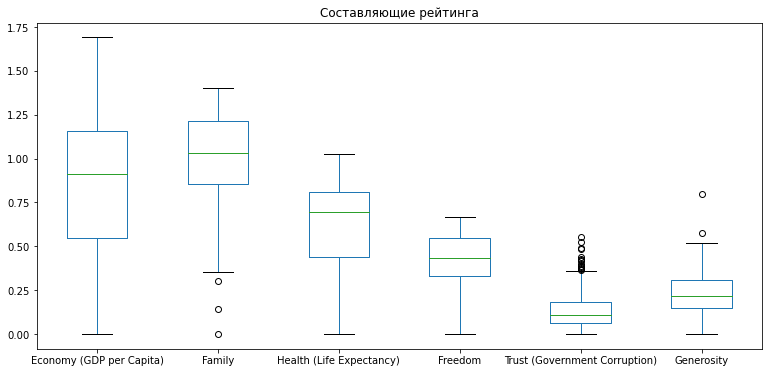

In [9]:
df_2015[xCol].plot(kind='box', title='Составляющие рейтинга')

Очень высока волатильность параметров, хотя тенденции и прослеживаются, но разброс во многом их нивелирует.

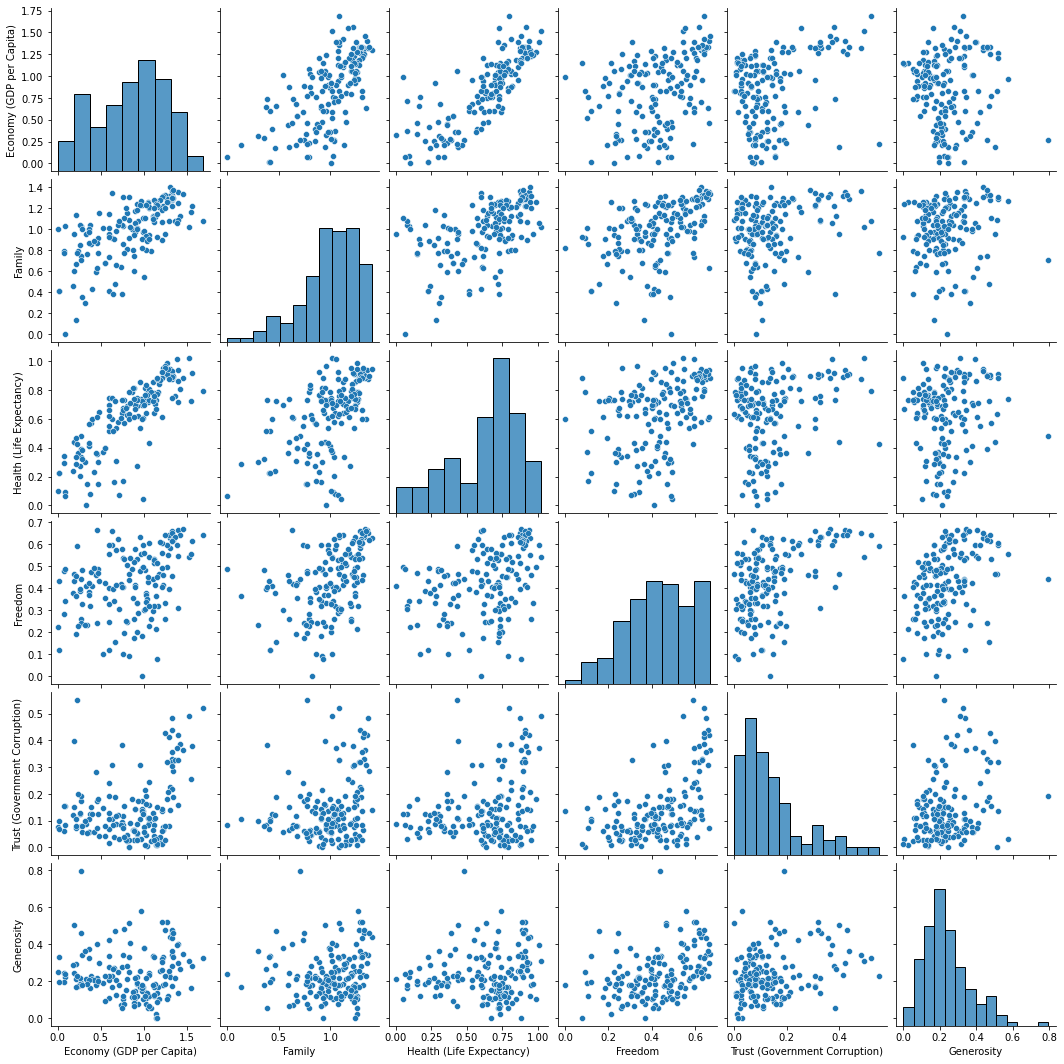

In [10]:
sns.pairplot(df_2015[xCol])

Анализировать эти картинки можно до бесконечности, но что видно сразу:
- практически очевидная взаимосвязь между развитием экономики (ВВП на душу населения) и здоровьем (чем лучше экономика, тем лучше и здоровье);
- аналогична зависимость между развитием экономики (ВВП на душу населения) и семейной стабильностью, но она уже выражена меньше;
- можно рассматривать центры группирования или их отсутствие: высокая семейная стабильность и хорошее здоровье, уровень свободы не связан с развитием экономики и т.д. и т.п.

In [20]:
# посмотрим, что было в другие годы 
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')
df_2016['year'] = 2016
df_2017['year'] = 2017
df_2018['year'] = 2018
df_2019['year'] = 2019

In [16]:
df_2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [17]:
df_2017

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [18]:
df_2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [19]:
df_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
Данные имеют разный формат. Приведение их по годам к общему знаменателю и анализ получившегося оставим на следующий раз :-)